<a href="https://colab.research.google.com/github/Daz-Riza-Seriog/Tensorflow_ML/blob/main/2-Customise%20your%20Models/3-%20Week%203/4-Recurrent%20Neural%20Network%20Layers/Recurrent_Neural_Network_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)


print('GPU name: {}'.format(tf.test.gpu_device_name()))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0
GPU name: /device:GPU:0


# Sequence modelling

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [ ]:
# Create a SimpleRNN layer and test it

simpleRNN_layer = tf.keras.layers.SimpleRNN(units=16)

In [ ]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1.,1.],[2.,2.],[56.,-100.]]])
layer_output = simpleRNN_layer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-1.        , -1.        , -1.        , -1.        ,  1.        ,
         0.99965113, -1.        , -1.        , -1.        ,  0.7595973 ,
         0.99999917, -1.        , -1.        , -1.        , -1.        ,
         1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)

    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset

(x_train,y_train),(x_test,y_test) = get_and_pad_imdb_dataset(maxlen=250)


17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [ ]:
# Get the maximum index value

max_index_values = max(imdb_word_index.values())
embedding_dim = 16

In [ ]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_values+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(units=1,activation="sigmoid")
])

#### Compile and fit the model

In [ ]:
# Compile the model with binary cross-entropy loss

model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

In [ ]:
# Fit the model and save its training history

history = model.fit(x_train,y_train,epochs=3, batch_size=32)

Epoch 1/3
536/536 [==============================] - 381s 699ms/step - loss: 0.4426 - accuracy: 0.7907
Epoch 2/3
536/536 [==============================] - 334s 624ms/step - loss: 0.2284 - accuracy: 0.9119
Epoch 3/3
536/536 [==============================] - 327s 611ms/step - loss: 0.1680 - accuracy: 0.9394


#### Plot learning curves

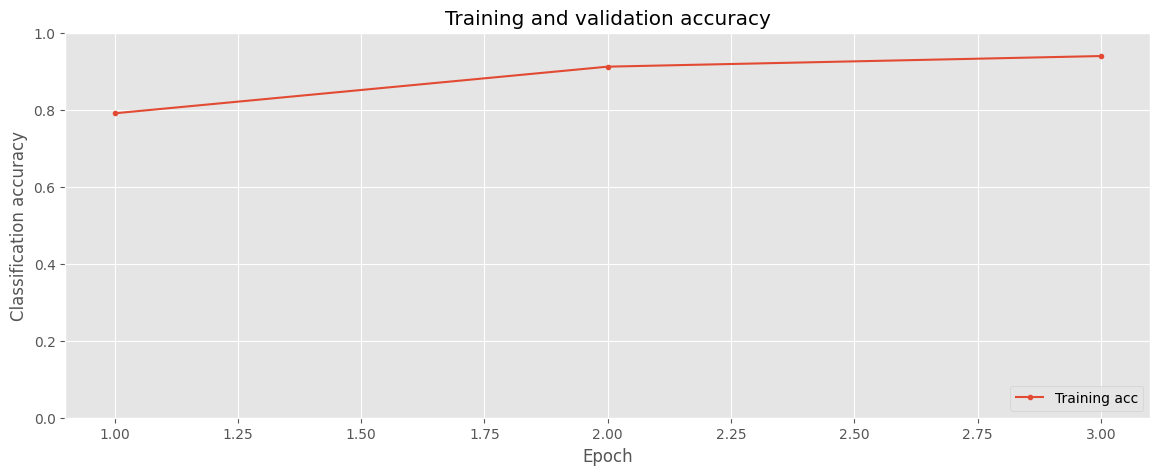

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
#val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
#val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
#plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [ ]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index>2]


['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [ ]:
# Get the model prediction using model.predict()

model.predict(x_test[None,0,:])

1/1 [==============================] - 2s 2s/step


array([[0.42694286]], dtype=float32)

In [ ]:
# Get the corresponding label

y_test[0]

0